In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
%matplotlib inline

In [29]:
DATADIR = "flower_photos"
CATEGORIES = ["daisy","dandelion","roses","sunflowers","tulips"]
IMAGE_SIZE = 150

### The rotations are done for image augmentation

In [30]:
data = []

def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                img_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
                img_rot = cv2.rotate(img_array,cv2.ROTATE_90_CLOCKWISE)
                img_flip = cv2.rotate(img_array,cv2.ROTATE_180)                
                data.append([img_array,class_num])
                data.append([img_rot,class_num])
                data.append([img_flip,class_num])
            except Exception as e:
                pass

create_data()

In [31]:
len(data)

11007

In [32]:
import random

random.shuffle(data)

In [33]:
test_size = 0.25

train_data = data[:-int(test_size * len(data))]
test_data = data[-int(test_size * len(data)):]

print(len(train_data))
print(len(test_data))

8256
2751


In [34]:
train_images = []
train_labels = []

for image, label in train_data:
    train_images.append(image)
    train_labels.append(label)

train_images = np.array(train_images).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,3)
train_labels = np.array(train_labels)

dandelion


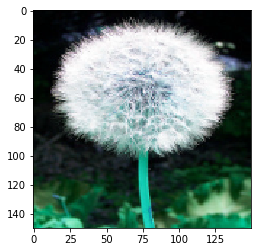

In [35]:
plt.imshow(train_images[0].reshape(IMAGE_SIZE,IMAGE_SIZE,3))
print(CATEGORIES[train_labels[0]])

In [36]:
test_images = []
test_labels = []

for image, label in test_data:
    test_images.append(image)
    test_labels.append(label)

test_images = np.array(test_images).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,3)
test_labels = np.array(test_labels)

daisy


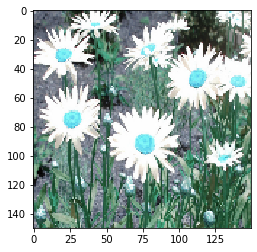

In [37]:
plt.imshow(test_images[0].reshape(IMAGE_SIZE,IMAGE_SIZE,3))
print(CATEGORIES[test_labels[0]])

In [38]:
import pickle

training_images_pickle = open("training_flower_images.pickle","wb")
pickle.dump(train_images, training_images_pickle)
training_images_pickle.close()

training_labels_pickle = open("training_flower_labels.pickle","wb")
pickle.dump(train_labels, training_labels_pickle)
training_labels_pickle.close()

test_images_pickle = open("test_flower_images.pickle","wb")
pickle.dump(test_images, test_images_pickle)
test_images_pickle.close()

test_labels_pickle = open("test_flower_labels.pickle","wb")
pickle.dump(test_labels, test_labels_pickle)
test_labels_pickle.close()